In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,Unnamed: 0,index,z,symbol,n,a,radius_val,radius_unc,N-Z,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC,jp,half_life [s],decay,radioactive
0,0,0,0,n,1,1,-0.1149,0.0027,1,8071.318060,0.000440,0.00000,0.0000,1008664.916,0.000470,1/2+,6.139000e+02,B-,1
1,1,1,1,H,0,1,0.8783,0.0086,-1,7288.971064,0.000013,0.00000,0.0000,1007825.032,0.000014,1/2+,3.441658e+29,stable,0
2,2,2,1,H,1,2,2.1421,0.0088,0,13135.722900,0.000015,1112.28310,0.0002,2014101.778,0.000015,1+,3.441658e+29,stable,0
3,3,3,1,H,2,3,1.7591,0.0363,1,14949.810900,0.000080,2827.26540,0.0003,3016049.281,0.000080,1/2+,3.887813e+08,B-,1
4,4,4,2,He,1,3,1.9661,0.0030,-1,14931.218880,0.000060,2572.68044,0.0001,3016029.322,0.000060,1/2+,3.441658e+29,stable,0


In [3]:
df.drop(columns=["Unnamed: 0",],axis=1,inplace=True) # this is an extra index column
df_no_unc = df.drop(columns=["radius_unc", "MASS EXCESS UNC", "BINDING ENERGY UNC", "ATOMIC MASS UNC"],axis=1) # don't worry about uncertainties to start
df_no_unc.describe()

,index,z,n,a,radius_val,N-Z,MASS EXCESS,BINDING ENERGY/A,ATOMIC MASS,half_life [s],radioactive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,9.570000e+02,9.570000e+02,957.000000
mean,478.000000,54.748171,76.220481,130.968652,4.689252,21.472309,-50015.910316,8147.680713,1.309150e+08,3.441658e+29,0.743992
std,276.406404,23.598461,36.057028,59.404798,0.830347,13.603797,34668.444214,694.654949,5.941365e+07,7.853791e+30,0.436655
min,0.000000,0.000000,0.000000,1.000000,-0.114900,-4.000000,-91652.843000,0.000000,1.007825e+06,8.750000e-03,0.000000
25%,239.000000,38.000000,51.000000,90.000000,4.261100,10.000000,-78144.769000,7912.066600,8.990714e+07,1.440000e+02,0.000000
50%,478.000000,56.000000,80.000000,137.000000,4.849600,21.000000,-61012.171000,8237.928600,1.369146e+08,3.358800e+04,1.000000
75%,717.000000,76.000000,105.000000,182.000000,5.380500,31.000000,-26937.498000,8509.612000,1.819747e+08,3.441658e+29,1.000000
max,956.000000,96.000000,152.000000,248.000000,5.904800,56.000000,67392.748000,8794.555500,2.480723e+08,2.430000e+32,1.000000


In [4]:
from sklearn.preprocessing import StandardScaler
df_no_unc_subset = df_no_unc[["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]] #
df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values
scaler = StandardScaler()
scaler.fit(df_no_unc_subset)
standardized = scaler.transform(df_no_unc_subset)
df_scaled = pd.DataFrame(standardized,columns=["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]) #

df_scaled = pd.concat([df_scaled, df_no_unc[['z', 'n', 'a', 'N-Z', ' jp', ' decay', 'radioactive']]], axis=1)
df_scaled.head()

C:\Users\docke\AppData\Local\Temp\ipykernel_1096\668940712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values


,radius_val,MASS EXCESS,BINDING ENERGY/A,ATOMIC MASS,half_life [s],z,n,a,N-Z,jp,decay,radioactive
0,-5.788740,1.676383,-11.735238,-2.187615,-0.689293,0,1,1,1,1/2+,B-,1
1,-4.591989,1.653805,-11.735238,-2.187630,1.555245,1,0,1,-1,1/2+,stable,0
2,-3.069179,1.822541,-10.133198,-2.170684,1.555245,1,1,2,0,1+,stable,0
3,-3.530673,1.874895,-7.663081,-2.153811,-0.202468,1,2,3,1,1/2+,B-,1
4,-3.281249,1.874358,-8.029764,-2.153812,1.555245,2,1,3,-1,1/2+,stable,0


In [7]:
y = df_scaled["radius_val"]
X = df_scaled.drop(["radius_val", ' jp', ' decay',],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [9]:
forest = RandomForestRegressor().fit(X_train, y_train)
y_pred = forest.predict(X_test)

score = forest.score(X_test,y_test)
print(score)

0.9987467351338708


In [10]:
score_list = []
for i in range(100):
    forest = RandomForestRegressor().fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    score_list.append(score)

    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


Text(0, 0.5, 'Count')

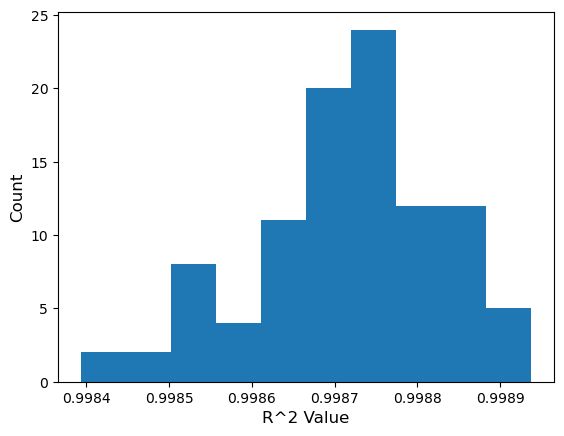

In [13]:
plt.hist(score_list,bins=10)
plt.xlabel("R^2 Value", fontsize="large")
plt.ylabel("Count", fontsize="large")